<a href="https://colab.research.google.com/github/RushilPatel0703/DAE_Project/blob/rushil/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url1 = 'https://raw.githubusercontent.com/RushilPatel0703/DAE_Project/main/eth_illicit_features.csv'
data_1 = pd.read_csv(url1)

url2 = 'https://raw.githubusercontent.com/RushilPatel0703/DAE_Project/main/transaction_dataset.csv'
data_2 = pd.read_csv(url2)

In [3]:
data_1.head()

,address,flag,minTimeBetweenSentTnx,maxTimeBetweenSentTnx,avgTimeBetweenSentTnx,minTimeBetweenRecTnx,maxTimeBetweenRecTnx,avgTimeBetweenRecTnx,lifetime,sentTransactions,...,totalEtherBalance,activityDays,dailyMax,ratioRecSent,ratioSentTotal,ratioRecTotal,giniSent,giniRec,txFreq,stdBalanceEth
0,0xd0cc2b24980cbcca47ef755da88b220a82291407,1,0.0,2387389.0,5.807655e+04,89.0,1.501076e+09,7.148260e+07,46,66,...,0.291940,10,60,0.313433,0.750000,0.238636,0.969121,0.888782,1.891304,147.701484
1,0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1,1,0.0,0.0,0.000000e+00,3021091.0,1.502802e+09,7.529115e+08,35,0,...,0.013541,2,1,2.000000,0.000000,0.666667,0.000000,0.238480,0.057143,0.005000
2,0x00e01a648ff41346cdeb873182383333d2184dd1,1,37.0,25112882.0,1.710279e+06,0.0,1.500397e+09,6.820612e+07,299,15,...,0.266494,14,16,1.375000,0.394737,0.578947,0.465450,0.614205,0.123746,52.129575
3,0x858457daa7e087ad74cdeeceab8419079bc2ca03,1,0.0,642460.0,1.576106e+04,0.0,1.500037e+09,1.352571e+07,36,109,...,0.007419,36,67,1.009091,0.493213,0.502262,0.957906,0.794121,6.111111,233.689231
4,0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d,1,0.0,0.0,0.000000e+00,3894.0,1.500402e+09,3.751409e+08,82,1,...,0.002199,3,3,2.000000,0.166667,0.666667,0.000000,0.406556,0.060976,0.757788


In [4]:
data_2.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [7]:
col_mapping1 = [f"{c[0]}:{c[1]}" for c in enumerate(data_1.columns)]
col_mapping1

['0:address',
 '1:flag',
 '2:minTimeBetweenSentTnx',
 '3:maxTimeBetweenSentTnx',
 '4:avgTimeBetweenSentTnx',
 '5:minTimeBetweenRecTnx',
 '6:maxTimeBetweenRecTnx',
 '7:avgTimeBetweenRecTnx',
 '8:lifetime',
 '9:sentTransactions',
 '10:receivedTransactions',
 '11:createdContracts',
 '12:numUniqSentAddress',
 '13:numUniqRecAddress',
 '14:minValSent',
 '15:maxValSent',
 '16:avgValSent',
 '17:minValReceived',
 '18:maxValReceived',
 '19:avgValReceived',
 '20:totalTransactions',
 '21:totalEtherSent',
 '22:totalEtherReceived',
 '23:totalEtherSentContracts',
 '24:totalEtherBalance',
 '25:activityDays',
 '26:dailyMax',
 '27:ratioRecSent',
 '28:ratioSentTotal',
 '29:ratioRecTotal',
 '30:giniSent',
 '31:giniRec',
 '32:txFreq',
 '33:stdBalanceEth']

In [8]:
col_mapping2 = [f"{c[0]}:{c[1]}" for c in enumerate(data_2.columns)]
col_mapping2

['0:Unnamed: 0',
 '1:Index',
 '2:Address',
 '3:FLAG',
 '4:Avg min between sent tnx',
 '5:Avg min between received tnx',
 '6:Time Diff between first and last (Mins)',
 '7:Sent tnx',
 '8:Received Tnx',
 '9:Number of Created Contracts',
 '10:Unique Received From Addresses',
 '11:Unique Sent To Addresses',
 '12:min value received',
 '13:max value received ',
 '14:avg val received',
 '15:min val sent',
 '16:max val sent',
 '17:avg val sent',
 '18:min value sent to contract',
 '19:max val sent to contract',
 '20:avg value sent to contract',
 '21:total transactions (including tnx to create contract',
 '22:total Ether sent',
 '23:total ether received',
 '24:total ether sent contracts',
 '25:total ether balance',
 '26: Total ERC20 tnxs',
 '27: ERC20 total Ether received',
 '28: ERC20 total ether sent',
 '29: ERC20 total Ether sent contract',
 '30: ERC20 uniq sent addr',
 '31: ERC20 uniq rec addr',
 '32: ERC20 uniq sent addr.1',
 '33: ERC20 uniq rec contract addr',
 '34: ERC20 avg time between s

In [9]:
corr = data_1.corr()

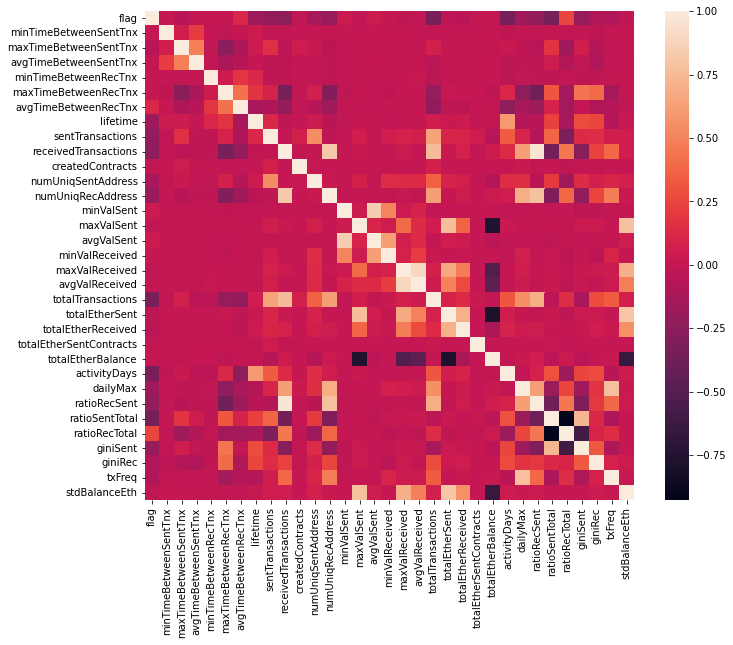

In [16]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, square=True)